<a href="https://colab.research.google.com/github/Vaggelis-Arg/Amazon-Ecommerce-Analysis/blob/main/Amazon_Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining (2024-2025)

### Team Information

#### Team member #1: [**Vaggelis-Arg**](https://github.com/Vaggelis-Arg)
* Name: Evangelos Argyropoulos
* ID: sdi2200010
* Email: sdi2200010@di.uoa.gr
---
#### Team member #2: [**chrisvl11**](https://github.com/chrisvl11)
* Name: Christos Vladikas
* ID: sdi2200020
* Email: sdi2200020@di.uoa.gr
---
#### Team member #3: [**tonykalantzis**](https://github.com/tonykalantzis)
* Name: Antonios Panagiotis Kalatzis
* ID: sdi2100046
* Email: sdi2100046@di.uoa.gr
---

## Set up of the notebook

### Downloads

In [1]:
!pip install nltk transformers torch contractions matplotlib seaborn wordcloud hf_xet scikit-learn
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118

### Remove any leftover datasets from previous runs

In [2]:
!rm -f *.csv

### Imports

In [ ]:
import nltk
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'wordnet','omw-1.4'])
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
import pandas as pd
import re
import string
import contractions
from nltk.corpus import stopwords
from datasets import load_dataset
from matplotlib.gridspec import GridSpec
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import hstack
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Part 1 - Pre-processing

### Task 1: Data Exploration and Feature Engineering

#### Dataset Preparation

We used the `datasets` library from Hugging Face to stream and extract reviews and metadata for selected Amazon product categories.

The dataset includes product reviews, ratings, and associated metadata. After loading, the data was saved as CSV files (`*_reviews_raw.csv` and `*_metadata_raw.csv`) to simplify further processing.

We ensure the CSVs contain essential fields like `rating`, `text`, `parent_asin`, and product details for later analysis.



In [4]:
# Configs: (category_name, review_config, meta_config)
datasets_info = [
    #("Books", "raw_review_Books", "raw_meta_Books"),
    ("All_Beauty", "raw_review_All_Beauty", "raw_meta_All_Beauty"),
    #("Electronics", "raw_review_Electronics", "raw_meta_Electronics"),
    #("Movies_and_TV", "raw_review_Movies_and_TV", "raw_meta_Movies_and_TV"),
    #("Sports_and_Outdoors", "raw_review_Sports_and_Outdoors", "raw_meta_Sports_and_Outdoors"),
]

# Select correct columns
review_columns = [
    "rating", "title", "text", "parent_asin", "asin" , "user_id", "timestamp",
    "helpful_vote", "verified_purchase"
]
meta_columns = [
    "parent_asin", "main_category", "title", "average_rating", "rating_number",
    "description", "price", "categories", "bought_together", "store"
]

for category, review_config, metadata_config in datasets_info:
    print(f"Loading: {category}")

    # Load streaming datasets with limited columns
    reviews_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        review_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(review_columns)

    metadata_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        metadata_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(meta_columns)

    # Convert to pandas and save
    reviews_df = pd.DataFrame(reviews_iter.take(200_000))
    metadata_df = pd.DataFrame(metadata_iter.take(200_000))

    reviews_df.to_csv(f"{category}_reviews.csv", index=False)
    metadata_df.to_csv(f"{category}_metadata.csv", index=False)

    print(f"Saved selected columns for {category}")


Loading: All_Beauty


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Saved selected columns for All_Beauty


#### Text Preprocessing

Text fields like `title` and `review text` were cleaned using a custom preprocessing function that includes:

- Lowercasing
- URL, mention, hashtag, and email removal
- Contraction expansion (`don't` → `do not`)
- Emoticon normalization (e.g., `:)` → `happy`)
- Removal of punctuation, numbers, and excessive character repetitions
- Lemmatization (reducing words to their base or dictionary form, e.g., running → run)

These cleaned fields (`cleaned_title`, `cleaned_text`) are used for visualizations and later analysis tasks.


In [5]:
# Emoticon dictionary for replacements
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'wordnet','omw-1.4', 'punkt_tab'])
emoticons = {
    ":)": "happy", ":D": "very happy", ":-)": "happy", "(:": "happy",
    ";)": "winking", ";-)": "winking", "(:": "happy", "^^": "happy",
    ":(": "sad", ":-(": "sad", "):": "sad",
    ":o": "surprised", ":-o": "surprised", ":O": "shocked",
    ":'(": "crying", ":-'(": "crying",
    ":P": "playful", ":-P": "playful", ";P": "cheeky", ";-P": "cheeky",
    "<3": "love", "</3": "heartbroken"
}
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def normalize_price(price, min_price, max_price):
    return (price - min_price) / (max_price - min_price) if max_price != min_price else 0

# Preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", 'link', text)  # replace URLs
    text = re.sub(r"\@\w+|\#\w+", 'tag', text)  # replace mentions and hashtags
    text = re.sub(r"\S+@\S+", 'mail', text)  # replace emails
    text = re.sub(r'\d+', 'number', text) # replace numbers
    text = contractions.fix(text)  # expand contractions

    # Replace emoticons
    for emoticon, word in emoticons.items():
        text = text.replace(emoticon, word)

    text = re.sub(r"[" + string.punctuation + "]", '', text)  # remove punctuation
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)  # reduce 3+ char repeats to 2

    text = text.strip()

    # Tokenize and Lemmatize

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    text = ' '.join(tokens)
    return text

# Load and clean each dataset
for category, *_ in datasets_info:
    print(f"Processing: {category}")
    reviews = pd.read_csv(f"{category}_reviews.csv")
    metadata = pd.read_csv(f"{category}_metadata.csv")

    reviews = reviews.dropna(subset=["rating", "text", "parent_asin"])
    reviews["cleaned_title"] = reviews["title"].apply(preprocess_text)
    reviews["cleaned_text"] = reviews["text"].apply(preprocess_text)
    reviews["timestamp"] = pd.to_datetime(reviews["timestamp"], unit="ms")

    metadata["cleaned_title_meta"] = metadata["title"].apply(preprocess_text)
    metadata["cleaned_description"] = metadata["description"].apply(preprocess_text)

    df = pd.merge(reviews, metadata, on="parent_asin", how="left", suffixes=("", "_meta"))

    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce')

        # Remove any rows where price is NaN
        df = df.dropna(subset=['price'])

        min_price = df['price'].min()
        max_price = df['price'].max()
        #df['normalized_price'] = df['price'].apply(lambda x: normalize_price(x, min_price, max_price))

    df.to_csv(f"{category}_cleaned.csv", index=False)
    print(f"Saved cleaned data to {category}_cleaned.csv")

print(reviews.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processing: All_Beauty
Saved cleaned data to All_Beauty_cleaned.csv
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text parent_asin        asin  \
0  This spray is really nice. It smells really go...  B00YQ6X8EO  B00YQ6X8EO   
1  This product does what I need it to do, I just...  B081TJ8YS3  B081TJ8YS3   
2                          Smells good, feels great!  B097R46CSY  B07PNNCSP9   
3                                     Felt synthetic  B09JS339BZ  B09JS339BZ   
4                                            Love it  B08BZ63GMJ  B08BZ63GMJ   

                        user_id               timestamp  helpful_vote  \
0  AGKHLEW2SOWHNMFQIJGBECAF7INQ 2020-05-0

#### Ratings and Reviews

We performed exploratory data analysis on the cleaned dataset, including:

##### 1. Rating Distribution

We plotted a histogram to show how product ratings are distributed across all reviews in each category.

##### 2. Low-Rated Popular Products – Word Cloud

We identified products with an average rating below 3 and a sufficient number of reviews, then generated a word cloud from their review texts to highlight frequently used negative terms.

##### 3. Rating Trends Over Time

We computed the average rating per month and plotted a line chart to observe how customer sentiment evolves over time. This helps detect seasonality or significant shifts in perception.

##### 4. Top 5 Best-Selling Products

We listed the five most-reviewed products in each category, including:
- Title
- ASIN
- Store (if available)
- Average rating
- Total number of reviews

Visualizing: All_Beauty


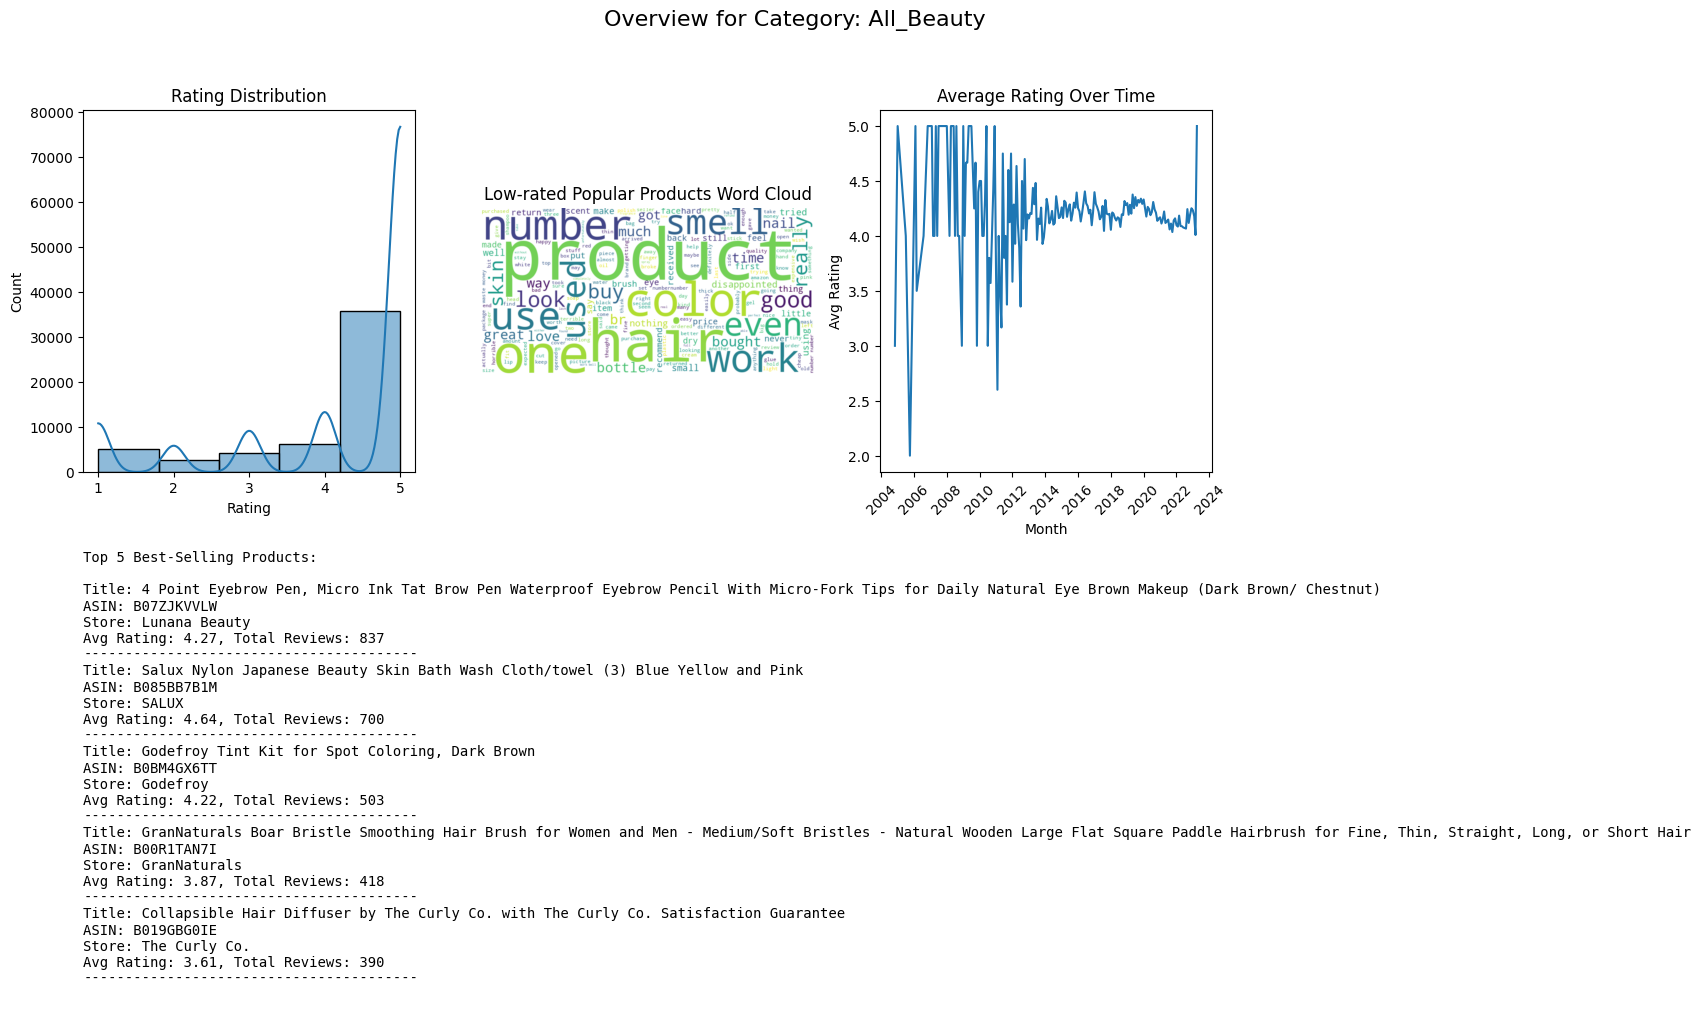

In [6]:
for category, *_ in datasets_info:
    print(f"Visualizing: {category}")
    df = pd.read_csv(f"{category}_cleaned.csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["month"] = df["timestamp"].dt.to_period("M").dt.to_timestamp()

    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df.dropna(subset=["rating"])

    stats = df.groupby("parent_asin").agg(
        avg_rating=("rating", "mean"),
		count=("rating", "count")
	).reset_index()

    bad_asins = stats[
    	(stats["count"] >= 0) & (stats["avg_rating"] < 3)
	]["parent_asin"]

    bad_text = " ".join(df[df["parent_asin"].isin(bad_asins)]["cleaned_text"].dropna())
    wordcloud = None
    if bad_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(bad_text)

    # Prepare trend data
    trend = df.groupby("month")["rating"].mean().reset_index()

    # Prepare top products text
    top5 = df["parent_asin"].value_counts().head(5).index
    top_products_info = ""
    for asin in top5:
        item = df[df["parent_asin"] == asin].iloc[0]
        avg_rating = df[df["parent_asin"] == asin]["rating"].mean()
        total_reviews = len(df[df["parent_asin"] == asin])
        top_products_info += (
            f"Title: {item.get('title_meta', 'N/A')}\n"
            f"ASIN: {asin}\n"
            f"Store: {item.get('store', 'Unknown')}\n"
            f"Avg Rating: {avg_rating:.2f}, Total Reviews: {total_reviews}\n"
            f"{'-'*40}\n"
        )

    # Create subplots
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f"Overview for Category: {category}", fontsize=16, y=1.02)
    gs = GridSpec(2, 3, figure=fig)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df["rating"], bins=5, kde=True, ax=ax1)
    ax1.set_title("Rating Distribution")
    ax1.set_xlabel("Rating")
    ax1.set_ylabel("Count")

    # Word Cloud
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Low-rated Popular Products Word Cloud")
    if wordcloud:
        ax2.imshow(wordcloud, interpolation="bilinear")
        ax2.axis("off")
    else:
        ax2.text(0.5, 0.5, "No data for word cloud", ha='center', va='center', fontsize=12)
        ax2.axis("off")

    # Trend Line
    ax3 = fig.add_subplot(gs[0, 2])
    sns.lineplot(data=trend, x="month", y="rating", ax=ax3)
    ax3.set_title("Average Rating Over Time")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Avg Rating")
    ax3.tick_params(axis='x', rotation=45)

    # Text Box for Top Products
    ax4 = fig.add_subplot(gs[1, :])
    ax4.axis("off")
    ax4.text(0, 1, f"Top 5 Best-Selling Products:\n\n{top_products_info}", ha='left', va='top', fontsize=10, family='monospace')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


### Task 2: Feature Engineering with Sentiment Scores and Ratings

#### SentimentScoreWithRating Class

This class combines the **text sentiment** of a review with its **numeric rating (1–5)** to generate a more informative sentiment score.

---

#### 1. Sentiment Extraction

- Uses either **VADER** or a **Hugging Face model** (`DistilBERT`, `RoBERTa`, or `BERT`)
- Converts review text to a sentiment score in the range:

$$
\text{sentiment\_score} \in [-1, 1]
$$

---

#### 2. Weighted Sentiment + Rating

To balance sentiment from text and numeric rating:

$$
\text{final\_score} = w_1 \cdot \text{sentiment\_score} + w_2 \cdot \text{normalized\_rating}
$$

where:

$$
\text{normalized\_rating} = \frac{\text{rating} - 1}{4}
$$

Default weights: \( w_1 = 0.5 \), \( w_2 = 0.5 \)

---

#### 3. Rating-Adjusted Sentiment

Boost or reduce sentiment depending on how strong the rating is:

- Add adjustment (e.g. +0.2) if rating is 4 or 5  
- Subtract adjustment (e.g. -0.2) if rating is 1 or 2

This ensures the final score reflects both tone and user satisfaction.

---

In [7]:
class SentimentScoreWithRating:
    def __init__(self, method="vader"):
        """
        method: "vader" or one of ["distilbert", "roberta", "bert"]
        """
        self.method = method.lower()
        if self.method == "vader":
            self.analyzer = SentimentIntensityAnalyzer()
        elif self.method in ["distilbert", "roberta", "bert"]:
            model_map = {
                "distilbert": "distilbert-base-uncased-finetuned-sst-2-english",
                "roberta": "cardiffnlp/twitter-roberta-base-sentiment",
                "bert": "nlptown/bert-base-multilingual-uncased-sentiment"
            }
            self.analyzer = pipeline("sentiment-analysis", model=model_map[self.method])
        else:
            raise ValueError("Unsupported method")

    def extract_sentiment_score(self, text):
        """
        Returns a sentiment score in range [-1, +1]
        """
        if self.method == "vader":
            score = self.analyzer.polarity_scores(text)["compound"]
            return score
        else:
            result = self.analyzer(text[:512])[0]
            label = result["label"]

            if self.method == "distilbert":
                return 1.0 if "positive" in label.lower() else -1.0

            elif self.method == "roberta":
                # LABEL_0 = negative, LABEL_1 = neutral, LABEL_2 = positive
                if label == "LABEL_2":
                    return 1.0
                elif label == "LABEL_0":
                    return -1.0
                else:
                    return 0.0

            elif self.method == "bert":
                # label is '1 star', '2 stars', ..., '5 stars'
                stars = int(label.split()[0])
                return (stars - 3) / 2  # Maps 1→-1, 3→0, 5→+1

            else:
                raise ValueError("Unsupported method")


    def normalize_rating(self, rating):
        """
        Normalize rating from 1-5 stars to 0-1
        """
        return (rating - 1) / 4

    def sentiment_score_weighted_text_rating(self, text, rating, w_text=0.5, w_rating=0.5):
        """
        Combine text sentiment and normalized rating via weighted average
        """
        sentiment = self.extract_sentiment_score(text)
        norm_rating = self.normalize_rating(rating)
        combined_score = w_text * sentiment + w_rating * norm_rating
        return combined_score

    def sentiment_score_rating_adjusted(self, text, rating, adjustment=0.2):
        """
        Adjust sentiment based on rating intensity
        """
        sentiment = self.extract_sentiment_score(text)

        # Adjust based on rating range
        if rating >= 4:
            sentiment = min(sentiment + adjustment, 1.0)
        elif rating <= 2:
            sentiment = max(sentiment - adjustment, -1.0)
        # If rating == 3 → no adjustment

        return sentiment


### Task 3: Feature Engineering with Price Metrics

We created two new features to improve comparability between products:

---

#### 1. Weighted Rating  
To reduce the bias from products with few reviews, we used:

$$
\text{weighted\_rating} = \text{average\_rating} \times \log(\text{rating\_number} + 1)
$$

This boosts trust in ratings with more votes and penalizes small-sample anomalies.

---

#### 2. Price per Unit  
To compare products fairly across sizes (e.g., 500ml vs 250ml), we extracted quantities like `ml`, `g`, `oz`, and computed:

$$
\text{price\_per\_unit} = \frac{\text{price}}{\text{quantity}}
$$

If no quantity was found, we assumed `quantity = 1`.

In [8]:
for category, *_ in datasets_info:
    print(f"\nFeature Engineering for: {category}")

    # Load the cleaned dataset
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Ensure numeric types
    df["average_rating"] = pd.to_numeric(df["average_rating"], errors='coerce')
    df["rating_number"] = pd.to_numeric(df["rating_number"], errors='coerce')
    df["price"] = pd.to_numeric(df["price"], errors='coerce')

    # 1. Weighted Rating
    df["weighted_rating"] = df["average_rating"] * np.log(df["rating_number"] + 1)

    # 2. Quantity extraction and pattern tracking
    quantity_patterns = [
		r"(\d+\.?\d*)\s*(?:ml|milliliter)",
		r"(\d+\.?\d*)\s*(?:fl\s*?oz|fluid ounce)",
		r"(\d+\.?\d*)\s*(?:g|gram)",
		r"(\d+\.?\d*)\s*(?:kg|kilogram)",
		r"(\d+\.?\d*)\s*(?:lb|pound)s?",
		r"(\d+\.?\d*)\s*(?:count|ct|pack|pk)",
		r"(\d+\.?\d*)\s*(?:l|liter)s?",
		r"(\d+\.?\d*)\s*mg",
		r"(\d+)\s*pieces?",
		r"(\d+)\s*tablets?",
		r"(?i)(\d+)\s*(?:count|ct|pack|pk|pc|pcs|piece|bag|bottle|bar|serving)s?\b",
		r"(?i)(\d+\.?\d*)\s*(?:ounce|oz)s?",
		r"(?i)\b(\d+)\s*per\s*(?:pack|bottle)\b",
		r"(?i)(\d+)\s*(?:sheets|pads|wipes)\b",
		r"(?i)(\d+)\s*(?:inch|in)\b",
	]

    df["quantity_extracted"] = np.nan
    df["matched_pattern"] = np.nan

    for pattern in quantity_patterns:
        title_match = df["title"].str.extract(pattern, expand=True)
        desc_match = df["description"].str.extract(pattern, expand=True)

        title_qty = pd.to_numeric(title_match[0], errors="coerce")
        desc_qty = pd.to_numeric(desc_match[0], errors="coerce")

        match = title_qty.combine_first(desc_qty)

        mask = df["quantity_extracted"].isna() & match.notna()
        df.loc[mask, "quantity_extracted"] = match[mask]
        df.loc[mask, "matched_pattern"] = pattern

    # Default quantity = 1 if nothing was extracted
    df["quantity_extracted"] = df["quantity_extracted"].fillna(1)

    # Compute price per unit
    df["price_per_unit"] = df["price"] / df["quantity_extracted"]
    df["price_per_unit"] = df["price_per_unit"].replace([np.inf, -np.inf], np.nan)

    # Print sample of ALL features
    sample_all = df[[
        "title", "price", "average_rating", "rating_number",
        "weighted_rating", "quantity_extracted", "price_per_unit"
    ]].dropna().head(10)

    print("\nSample of generalized engineered features (top 10):")
    print(sample_all.to_string(index=False))



Feature Engineering for: All_Beauty


<ipython-input-8-b590c557a01f>:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                                        title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
                                         Yes!  21.98             4.4            699        28.824753                 1.0           21.98
                                 Pretty Color   7.10             3.8             32        13.286729                 1.0            7.10
                                      Just ok  49.95             3.3             25        10.751719                 1.0           49.95
              You won’t regret this purchase.   7.99             3.7           2940        29.550068                 1.0            7.99
                                  Ineffective   9.99             4.5           3264        36.409568                 1.0            9.99
                                        Love!  11.99             4.5           5636        38.866983                 1.0     

## Part 2 - Learning Tasks

### Clustering



Clustering for All_Beauty


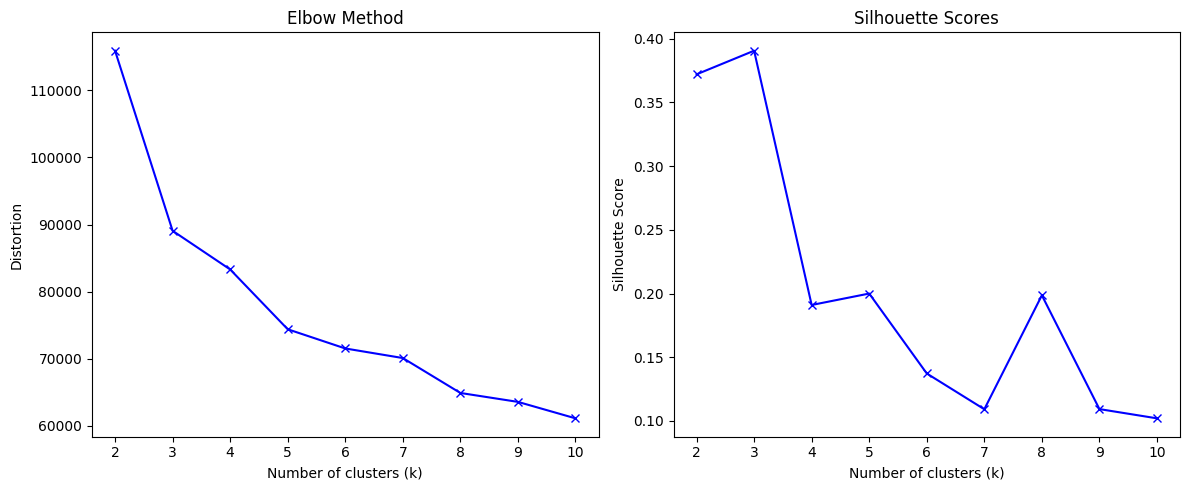

Optimal k for clusters: 3


In [ ]:
def cluster_category(category):
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Fill NaN values with empty string
    df['cleaned_title_meta'] = df['cleaned_title_meta'].fillna('')
    df['cleaned_description'] = df['cleaned_description'].fillna('')

    df['combined_text'] = df['cleaned_title_meta'] + " " + df['cleaned_description']

    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.8) #NA DOUME MAX_FEATURES max_features=5000,
    tfidf_matrix = tfidf.fit_transform(df['combined_text'])

    # Scale the numerical features
    numerical_features = df[['price', 'rating']].copy()
    # Fill NaN values in numerical features with mean or appropriate value
    numerical_features = numerical_features.fillna(numerical_features.mean())
    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(numerical_features)

    feature_matrix = hstack([tfidf_matrix, numerical_scaled])

    # Elbow method to find the best K for clustering
    distortions = []
    silhouette_scores = []
    K_range = range(2, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_matrix)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(feature_matrix, kmeans.labels_))

    # Plot Elbow method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.tight_layout()
    plt.show()

    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal k for clusters: {optimal_k}")

    # Perform clustering with the optimal number of clusters we found from elbow method
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(feature_matrix)
    df['cluster'] = clusters

    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_matrix.toarray())

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1],
                    hue=clusters, palette='viridis', alpha=0.6)
    plt.title(f'PCA Visualization of Clusters for {category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    # Analyze cluster characteristics
    cluster_stats = df.groupby('cluster').agg({
        'rating': 'mean',
        'price': 'mean',
        'title_meta': 'count'
    }).rename(columns={'title': 'count'})

    print("\nCluster Statistics:")
    print(cluster_stats)

    # Print sample products from each cluster
    for cluster_id in range(optimal_k):
        print(f"\nCluster {cluster_id} Sample Products:")
        sample_products = df[df['cluster'] == cluster_id][['title_meta', 'rating', 'price']].sample(3)
        print(sample_products.to_string(index=False))

    return df


# Perform clustering for each category
for category, *_ in datasets_info:
    print(f"\nClustering for {category}")
    clustered_df = cluster_category(category)
    clustered_df.to_csv(f"{category}_clustered.csv", index=False)

### Recommendation system


In [ ]:
# Load the cleaned dataset for All_Beauty
df = pd.read_csv("All_Beauty_cleaned.csv")

# Drop rows with missing essential data
df = df.dropna(subset=['user_id', 'asin', 'rating', 'cleaned_text', 'title_meta', 'price'])
df = df[['user_id', 'asin', 'rating', 'cleaned_text', 'title_meta', 'price']]

user_item_matrix = df.pivot_table(index='user_id', columns='asin', values='rating').fillna(0)

# Compute user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Predict a user's rating for an item using user-based collaborative filtering
def predict_user_based(user_id, item_asin, k=5):
    if item_asin not in user_item_matrix.columns:
        return 0

    # Get top-k similar users
    sim_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1]

    # Ratings from similar users to the given item
    relevant_ratings = user_item_matrix.loc[sim_users.index, item_asin]

    # Compute weighted of ratings based on user similarity
    weighted_ratings = np.dot(sim_users.values, relevant_ratings)
    sim_sum = sim_users.values.sum()
    return weighted_ratings / sim_sum if sim_sum != 0 else 0

# Transpose the user-item matrix to create an item-user matrix
item_user_matrix = user_item_matrix.T

# Compute item similarity
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

# Predict a user's rating for an item using item-based collaborative filtering
def predict_item_based(user_id, item_asin, k=5):
    if item_asin not in user_item_matrix.columns:
        return 0

	# Get items that the user has already rated
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0]

	# find similarities between the given item and the items rated by the user
    similarities = item_similarity_df.loc[item_asin, rated_items.index]
    top_k = similarities.sort_values(ascending=False).head(k)

    if top_k.sum() == 0:
        return 0

	# return weighted average of the user's ratings for similar items
    weighted_sum = np.dot(top_k.values, rated_items[top_k.index])
    return weighted_sum / top_k.sum()

# Combine text features more effectively
df['combined_text'] = df['cleaned_title_meta'] + " " + df['cleaned_description']

# Load pre-trained Word2Vec model
word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Convert a product's text description into a single vector using Word2Vec
def vectorize_text(text, model):
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model:
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['w2v_vector'] = df['combined_text'].apply(lambda x: vectorize_text(x, word2vec_model))

# Stack vectors into a matrix
vector_matrix = np.vstack(df["w2v_vector"].values)
cosine_sim_matrix = cosine_similarity(vector_matrix)

asin_to_index = pd.Series(df.index, index=df['asin'])

def recommend_hybrid(user_id, k=5, cf_weight=0.7, cbf_weight=0.3):
    predictions = {}

	# Loop through items not yet rated by the user
    for asin in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, asin] == 0:
            # CF Score (average of user- and item-based)
            # Predict how much the user might like this product based on what similar users liked and what similar products the user liked
            user_cf_score = predict_user_based(user_id, asin, k) # get average score from ratings to current item from similar users
            item_cf_score = predict_item_based(user_id, asin, k) # get average score from ratings the user gave to similar items
            cf_score = (user_cf_score + item_cf_score) / 2 # Average the two scores

            # CBF Score: average similarity score to items the user rated highly
            # Estimate how similar this product is to others the user liked
            cbf_sim_score = 0
            if asin in asin_to_index:
                user_rated_items = user_item_matrix.loc[user_id]
                liked_items = user_rated_items[user_rated_items >= 4].index # Products user liked
                sim_scores = []
                for liked_asin in liked_items:
                    if liked_asin in asin_to_index:
                        # Compare the current product with each liked product
                        sim = cosine_sim_matrix[asin_to_index[asin], asin_to_index[liked_asin]]
                        sim_scores.append(sim)
                if sim_scores:
                    cbf_sim_score = np.mean(sim_scores) # Average similarity to liked items

            # Final hybrid score
            hybrid_score = (cf_weight * cf_score) + (cbf_weight * cbf_sim_score)
            predictions[asin] = hybrid_score

    # Top-K recommendations
    top_k_asins = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:k]
    return df[df['asin'].isin([a[0] for a in top_k_asins])][['asin', 'title_meta', 'price']]